In [1]:
import matplotlib.pyplot as plt
import numpy as np

9
2.4444444444444446


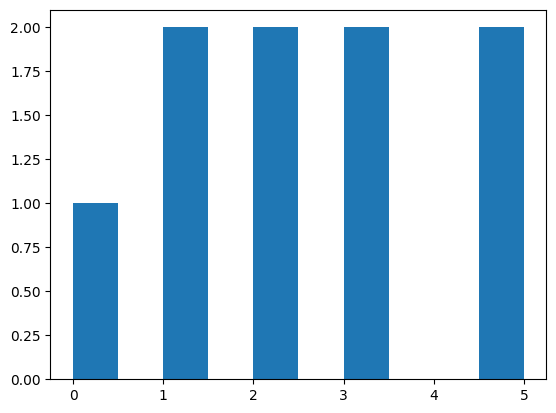

In [2]:
# volatage is 1200 V, Lower PMT, Integral Time of 2 secs, St90
Pcounts = [1,1,5,3,2,0,3,2,5]
print(len(Pcounts))
print(np.mean(Pcounts))
plt.figure()
plt.hist(Pcounts)
plt.show()

100
0.8


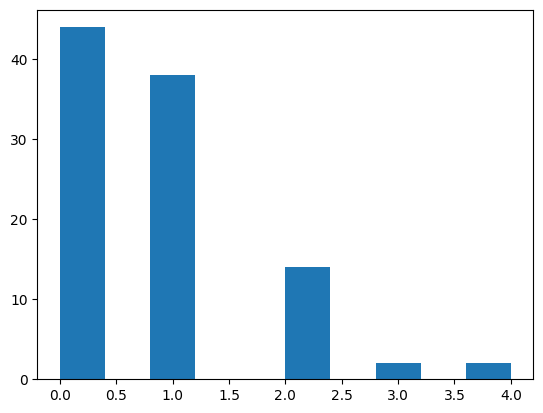

In [3]:
#voltage is 1200V, Integral time is 1 sec
Pcounts = [0,2,2,0,1,0,2,2,1,2,
           1,2,0,0,0,0,0,0,4,1,
           0,0,1,0,1,1,1,0,0,0,
           2,1,0,0,0,2,1,1,2,2,
           0,0,0,0,1,0,1,0,1,0,
           1,1,0,0,1,1,1,0,1,1,
           1,0,0,0,0,1,1,1,0,2,
           3,1,1,1,0,0,0,0,0,0,
           2,0,1,2,1,0,1,0,1,1,
           0,1,1,2,1,0,4,3,1,1]
print(len(Pcounts))
print(np.mean(Pcounts))
plt.figure()
plt.hist(Pcounts)
plt.show()

47
0.9787234042553191


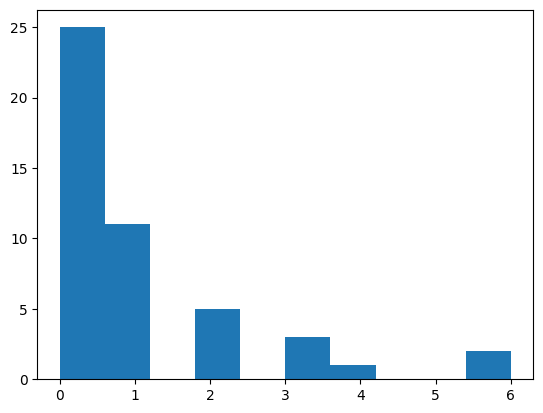

In [4]:
#voltage is 1225V, Integral time is 1 sec
Pcounts = [1,2,2,2,1,4,1,1,1,2,
           1,2,0,0,0,3,6,3,1,3,
           6,1,0,0,1,0,0,0,0,0,
           1,0,0,0,0,0,0,0,1,0,
           0,0,0,0,0,0,0]
print(len(Pcounts))
print(np.mean(Pcounts))
plt.figure()
plt.hist(Pcounts)
plt.show()

100
1.82


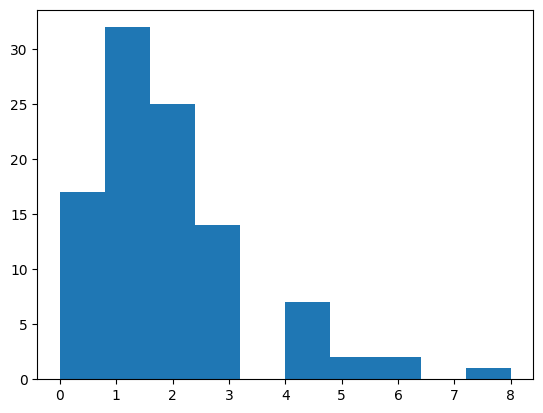

In [5]:
#voltage is 1200V, Integral time is 2 sec
Pcounts = [1,2,2,2,2,1,2,5,2,3,
           1,2,3,0,0,2,4,1,1,3,
           2,1,2,2,1,0,4,2,1,0,
           1,0,1,1,3,4,3,0,5,0,
           3,0,2,8,3,1,0,2,0,3,
           1,2,0,2,1,0,1,1,1,2,
           4,2,3,3,3,3,1,0,1,1,
           2,3,1,4,1,1,3,1,4,1,
           4,6,1,0,2,1,2,0,6,2,
           2,1,1,2,1,2,0,0,1,1
           ]
print(len(Pcounts))
print(np.mean(Pcounts))
plt.figure()
plt.hist(Pcounts)
plt.show()

In [6]:
#voltage is 1175V, Integral time is 2 sec
Pcounts = [1,1,0,1,1,1,1,0,1,0,
           0,0]
print(len(Pcounts))
print(np.mean(Pcounts))

12
0.5833333333333334


In [7]:
#voltage is 1175V, Integral time is 3 sec
Pcounts = [1,2,1,0,0,0,0,1,1,
           2,0,1,]
print(len(Pcounts))
print(np.mean(Pcounts))

12
0.75


102
10.852941176470589


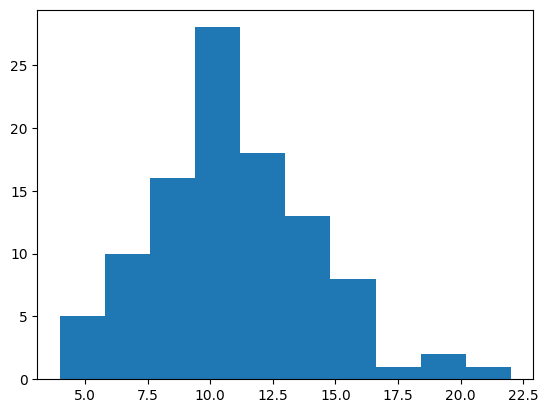

In [8]:
# gaussian (high) counts 1250, 2 sec interval
Gcounts = [11,14,10,6,11,8,11,11,13,7,
           8,9,12,14,7,5,8,12,13,8,9,11,
           5,10,12,12,12,12,11,7,9,10,
           4,8,7,15,7,8,12,14,12,15,10,
           14,11,7,6,12,12,15,16,8,10,
           12,10,10,13,8,11,22,14,19,
           8,10,10,11,8,10,10,6,16,16,
           15,10,4,14,10,10,11,10,14,20,
           8,12,16,12,10,10,12,12,13,
           7,12,17,9,10,13,12,9,5,12,13


]
print(len(Gcounts))
print(np.mean(Gcounts))
plt.figure()
plt.hist(Gcounts)
plt.show()



100
109.2


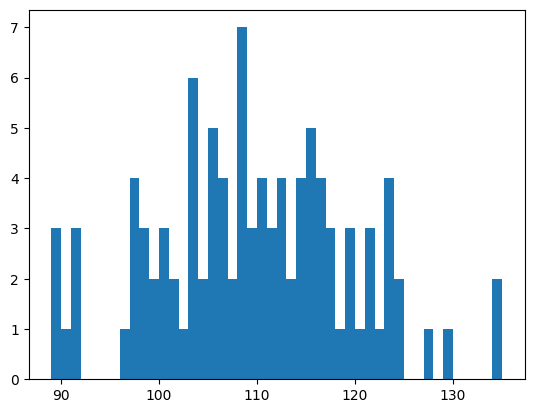

In [11]:
# guassian counts for 1400V interval 3 seconds
Gcounts = [100,98,98,124,118,109,124,111,89,119,
           123,114,106,108,105,112,117,111,121,
           89,115,105,108,97,107,100,115,104,
           97,123,91,116,91,106,103,106,117,
           89,110,110,105,123,116,103,127,116,
           112,129,103,123,101,113,102,134,121,
           110,114,115,119,107,114,99,91,98,
           108,103,119,113,101,108,117,111,
           103,105,90,112,108,103,115,110,
           106,100,122,109,108,121,108,99,
           120,116,112,114,96,105,109,104,
           115,97,97,135
]
print(len(Gcounts))
print(np.mean(Gcounts))
plt.figure()
plt.hist(Gcounts,bins=46)
plt.show()


In [10]:
max(Gcounts)-min(Gcounts)

46